#Data Preparation

Read the bodyPerformance_imbalanced.csv file into a DataFrame using pandas.
Check for any missing values and handle them appropriately.

In [95]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Phase2/Week5/Day3/Copy of bodyPerformance_imbalanced.csv")
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,B
1,25,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,B
3,32,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  int64  
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.2+ MB


In [97]:
df.isnull().sum()

,0
age,0
gender,0
height_cm,0
weight_kg,0
body fat_%,0
diastolic,0
systolic,0
gripForce,0
sit and bend forward_cm,0
sit-ups counts,0


In [98]:
df.duplicated().sum()

np.int64(1)

In [99]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [100]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['class'] = le.fit_transform(df['class'])


#Preprocess the Data

Split the dataset into features (X) and target (y).
Split the data into training and testing sets using train_test_split.

In [101]:
y = df['class']
X = df.drop("class",axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=1, stratify=y
)

#Analyze Class Imbalance

Visualize the distribution of classes.
Discuss the implications of class imbalance.

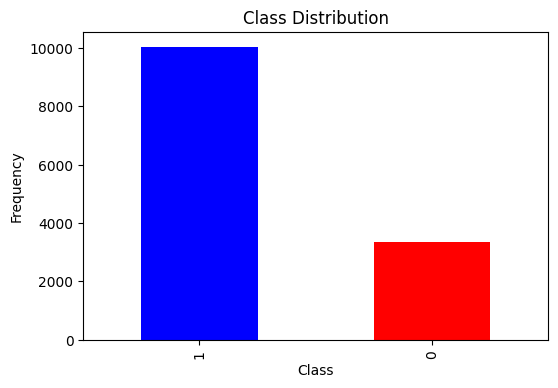

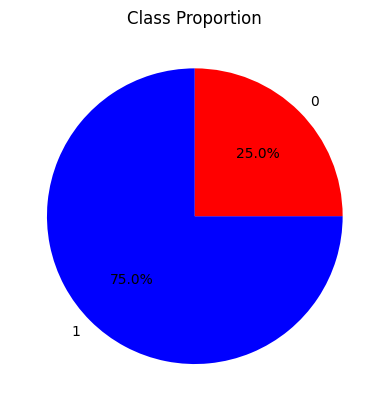

In [102]:
import matplotlib.pyplot as plt

class_counts = df["class"].value_counts()
plt.figure(figsize=(6,4))
class_counts.plot(kind="bar", color=["blue", "red"])
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Class Distribution")
plt.show()

class_counts.plot(kind="pie", autopct="%1.1f%%", colors=["blue", "red"], startangle=90)
plt.title("Class Proportion")
plt.ylabel("")
plt.show()


###Due to class 1 has significantly more instances than the other class , This imbalance can lead to biased models to class 1 that perform poorly on the minority class like class 0

#Apply Techniques to Handle Imbalance

Implement class weighting in a model.Apply resampling methods (oversampling or undersampling).


In [103]:
from sklearn.tree import DecisionTreeClassifier
weights  = {1: 1.5, 0: 5.2}

model = DecisionTreeClassifier(class_weight=weights,max_depth=6, random_state=12)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 5.2, 1: 1.5}, max_depth=6,
                       random_state=12)

#Model Evaluation

Train a classifier on the dataset.
Evaluate the model using appropriate metrics (accuracy, precision, recall, F1-score).
Visualize results using confusion matrix.

In [104]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
y_test_pred = model.predict(X_test)
print("Accuracy =", accuracy_score(y_test, y_test_pred))
print("Precision score =", precision_score(y_test, y_test_pred))
print("Recall score =", recall_score(y_test, y_test_pred))
print("F1 score =", f1_score(y_test, y_test_pred))

Accuracy = 0.7880597014925373
Precision score = 0.9762219286657859
Recall score = 0.7353233830845771
F1 score = 0.8388195232690124


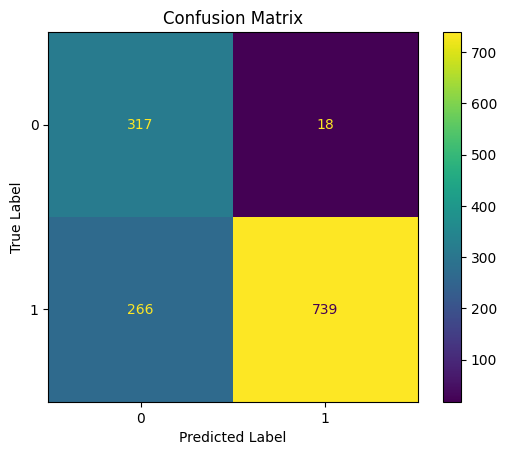

In [105]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_test_pred)
labels = model.classes_
matrix = ConfusionMatrixDisplay(cm, display_labels=labels)
matrix.plot()
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()